# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

Необходимо определить рыночную стоимость объектов недвижимости. 

Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Загрузка библиотек и изучение общей информации о данных. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/Users/olga/Учеба/datasets/real_estate_data.csv', sep = '\t')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


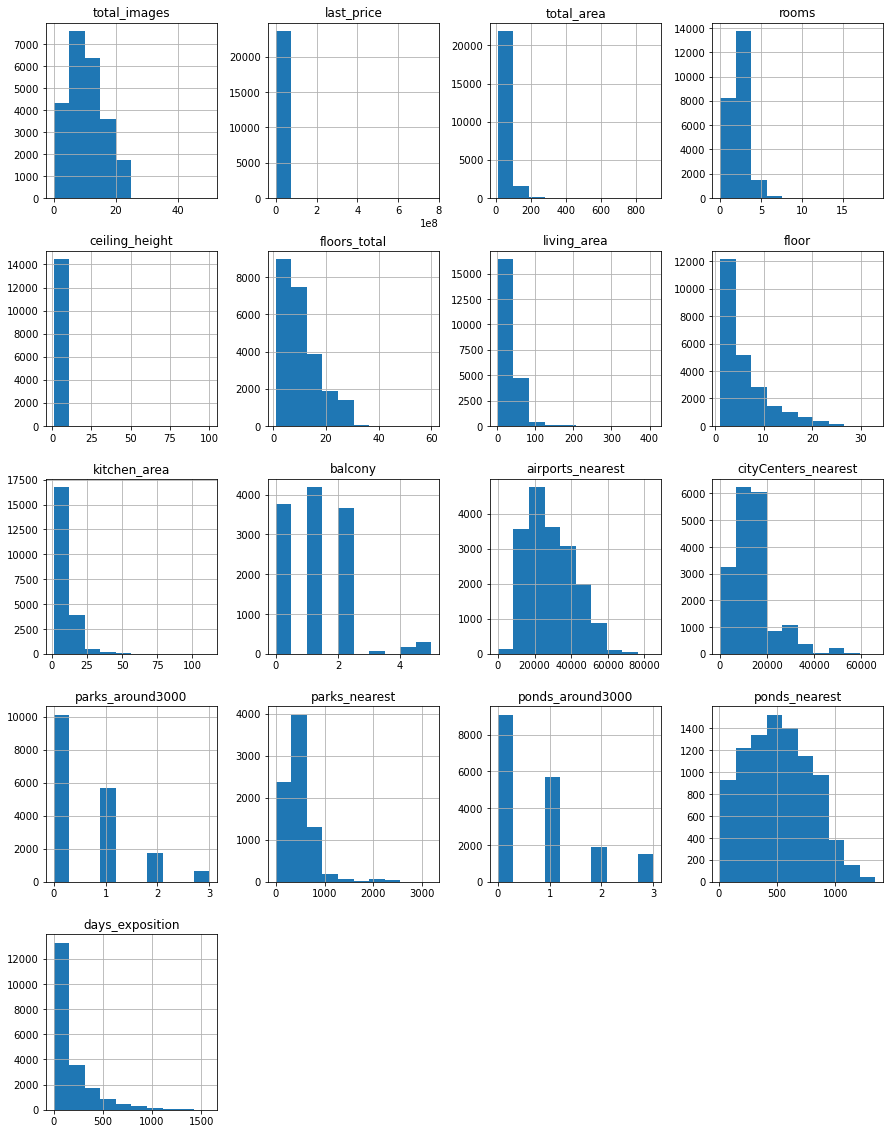

In [6]:
data.hist(figsize = (15,20));
plt.show()

## Предобработка данных

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Применив методы, мы увидели что в 13-ти столбцах есть довольно большое количество пропусков,
от незначительного количества, до 68%. Будем проверять эти пропуки.
Тут же мы смогли отмeтить, что названия столбцов не содержат лишних пробелов, символов и прочих недостатков, с ними можно работать не передобрабатывая.

In [9]:
data.duplicated().sum()

0

В датасете отсутствуют явные дубликаты

In [10]:
data['balcony'] = data['balcony'].fillna(0)

Предположим, что если не указано количество балконов, значит они отсутствуют, тогда мы можем заменить пропущенные значения на 0

In [11]:
data = data.dropna(subset = ['floors_total'])

Как мы видим,количество пропусков в данных столбца незначительно, если мы удалим их, существенного влияния на результат это не окажет.

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23613.0,9.874518e+00,5.681541e+00,0.0,6.00,9.00,14.0,50.0
last_price,23613.0,6.540555e+06,1.090172e+07,12190.0,3400000.00,4650000.00,6799000.0,763000000.0
total_area,23613.0,6.034068e+01,3.564899e+01,12.0,40.00,52.00,69.8,900.0
rooms,23613.0,2.071147e+00,1.078380e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14495.0,2.771495e+00,1.261445e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21743.0,3.446278e+01,2.203743e+01,2.0,18.60,30.00,42.3,409.7
floor,23613.0,5.877313e+00,4.873539e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21382.0,1.056413e+01,5.904316e+00,1.3,7.00,9.10,12.0,112.0
balcony,23613.0,5.930631e-01,9.603071e-01,0.0,0.00,0.00,1.0,5.0


In [13]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


В данном столбце, как и в столбце kitchen_area, касающихся площади, довольно много пропусков, однако, современные собственники квартир довольно часто используют "свободную планировку", там где кухни совмещены с комнатами и прочими помещениями, либо наоборот, в большой комнате отделяется чать под зону другого назначения, потому данные о жилой площади, либо кухне не всегда можно измерить. Считаю, что не стоит заменять или удалять строки с пропусками в данных столбцах.


In [14]:
data['ceiling_height'].describe()

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [15]:
data = data.query('(2.2<=ceiling_height<=5) or (ceiling_height!=ceiling_height)')
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('rooms')['ceiling_height'].transform("median"))

Заменили в данном случае все пропуски высоты потолков на медианное значение и убрали аномальные значения.

In [16]:
data['ceiling_height'].describe()

count    23562.000000
mean         2.694723
std          0.221642
min          2.200000
25%          2.600000
50%          2.640000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

In [17]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [18]:
data['locality_name'].nunique()

363

In [19]:
data = data.dropna(subset = ['locality_name'])

убрали пропуски, так как заменить их не возможно корректно

In [20]:
wrong_locality = ['посёлок','поселок городского типа','городской посёлок','посёлок городского типа']

for name in wrong_locality:
    data['locality_name'] = data['locality_name'].str.replace(name,'поселок' )
    

data[(data['locality_name'].str.contains('поселок')) & (data['locality_name'].notna())]['locality_name'].head(30)


1                 поселок Шушары
5      городской поселок Янино-1
6              поселок Парголово
8                 поселок Мурино
20             поселок Парголово
37           поселок Красный Бор
38                поселок Мурино
40             поселок Парголово
53             поселок Парголово
57                поселок Шушары
60                поселок Мурино
66                поселок Мурино
73             поселок Парголово
82                поселок Шушары
83             поселок Парголово
86          поселок Металлострой
88               поселок Лебяжье
89             поселок Сиверский
91             поселок Молодцово
92         поселок Кузьмоловский
113            поселок Парголово
133               поселок Мурино
139        поселок Кузьмоловский
144               поселок Мурино
151               поселок Аннино
158    городской поселок Янино-1
160               поселок Шушары
164           поселок Ефимовский
166             поселок Плодовое
170            поселок Торковичи
Name: loca

In [21]:
data['locality_name'].nunique()

328

Убрали неявные дубликаты в названиях Населенных пунктов

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(0)

Будем считать, что если не указано, что это апартаменты ('is_apartment'=True), то это жилая недвижимость. Заменим все попущенные значения на 0 

Пропуски в столбцах с гео-данными заполнить корректно считаю не возможным. Оставим так как есть.
В стобце с days_exposition пропуски также ничем заменять не будем. Скорее всего, если этих данных нет, значит, обьявление не снято с публикации, квартира не продана.

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23515.0,9.878928e+00,5.678091e+00,0.0,6.0,9.00,14.00,50.0
last_price,23515.0,6.526765e+06,1.083914e+07,12190.0,3400000.0,4650000.00,6790000.00,763000000.0
total_area,23515.0,6.029728e+01,3.553564e+01,12.0,40.0,52.00,69.70,900.0
rooms,23515.0,2.070721e+00,1.078240e+00,0.0,1.0,2.00,3.00,19.0
ceiling_height,23514.0,2.694626e+00,2.215470e-01,2.2,2.6,2.64,2.70,5.0
floors_total,23515.0,1.067855e+01,6.591641e+00,1.0,5.0,9.00,16.00,60.0
living_area,21654.0,3.444059e+01,2.200086e+01,2.0,18.6,30.00,42.30,409.7
floor,23515.0,5.878801e+00,4.872311e+00,1.0,2.0,4.00,8.00,33.0
kitchen_area,21304.0,1.055978e+01,5.891901e+00,1.3,7.0,9.10,12.00,112.0
balcony,23515.0,5.927706e-01,9.594210e-01,0.0,0.0,0.00,1.00,5.0


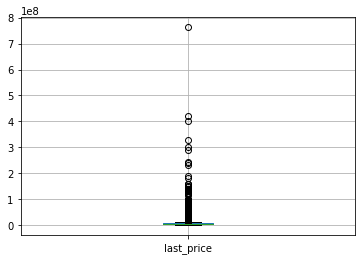

In [24]:
data.boxplot('last_price');

In [25]:
dt = []

for value in data['locality_name'].unique():
    data_tmp = data.query('locality_name == @value')
    p25 = np.quantile(data_tmp.last_price, 0.25)
    p75 = np.quantile(data_tmp.last_price, 0.75)
    dt.append(data_tmp[data_tmp['last_price'] <= p75 + 1.5*(p75-p25)])
    

data = pd.concat(dt).reset_index(drop=True)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,0,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5.0,34.3,4,0,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,0,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
3,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.60,24.0,NaN,22,0,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
4,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,0,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
5,5,5050000.0,39.6,2017-11-16T00:00:00,1,2.67,12.0,20.3,3,0,...,8.5,0.0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
6,16,4650000.0,39.0,2017-11-18T00:00:00,1,2.64,14.0,20.5,5,0,...,7.6,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0
7,11,6700000.0,82.0,2017-11-23T00:00:00,3,3.05,5.0,55.6,1,0,...,9.0,0.0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0
8,6,4180000.0,36.0,2016-09-09T00:00:00,1,2.64,17.0,16.5,7,0,...,11.0,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0
9,8,3250000.0,31.0,2017-01-27T00:00:00,1,2.50,5.0,19.4,2,0,...,5.6,1.0,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0


Убрали выбросы ценовые, выходящие за пределы 1,5 межквартильного размаха

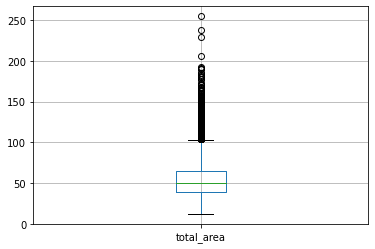

In [26]:
data.boxplot('total_area')
plt.show()


In [27]:
data = data.query('total_area.min() < total_area < total_area.max()')
data = data.query('last_price.min() < last_price')
data = data.query('rooms.min()< rooms < rooms.max()')


Убрали другие очевидные выбросы.

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,21701.0,9.734160e+00,5.558907e+00,0.0,6.00,9.00,14.00,50.00
last_price,21701.0,5.074225e+06,2.570898e+06,430000.0,3380000.00,4500000.00,6200000.00,28000000.00
total_area,21701.0,5.454539e+01,2.054240e+01,13.0,39.50,50.00,65.00,238.26
rooms,21701.0,1.971568e+00,9.162501e-01,1.0,1.00,2.00,3.00,6.00
ceiling_height,21701.0,2.672782e+00,1.918746e-01,2.2,2.60,2.64,2.70,5.00
floors_total,21701.0,1.074407e+01,6.612056e+00,1.0,5.00,9.00,16.00,60.00
living_area,20025.0,3.129210e+01,1.444653e+01,2.0,18.20,29.70,40.00,160.00
floor,21701.0,5.871895e+00,4.885160e+00,1.0,2.00,4.00,8.00,33.00
kitchen_area,19839.0,9.759827e+00,4.050449e+00,1.3,7.00,9.00,11.05,64.00
balcony,21701.0,5.884521e-01,9.437514e-01,0.0,0.00,0.00,1.00,5.00


Изменили типы данных в столбцах, которые будут нам нужны далее для анализа

In [29]:
data['cityCenters_nearest'].duplicated().count()

21701

In [30]:
data['cityCenters_nearest'] = (data['cityCenters_nearest'] / 1000).round(0)
data['cityCenters_nearest'].describe()

count    16465.000000
mean        14.634497
std          8.454634
min          0.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         66.000000
Name: cityCenters_nearest, dtype: float64

В разделе выше мы ознакомитись с данными файла, просмотрели все параметры, педприняли меры для первичной обработки данных(очистке от явных дубликатов, очистке данных). Перевели значения расстояния от центра из метров в километры и округлили.

## Посчитаем и добавим в таблицу новые столбцы: день недели, месяц и год экспозиции, стоимость 1 кв.м.

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y.%m.%dT%H:%M')
data['first_day_exposition']

0       2019-03-07
1       2015-08-20
2       2018-06-19
3       2019-04-18
4       2017-02-26
           ...    
21894   2018-06-16
21895   2018-07-10
21896   2018-02-26
21897   2017-06-30
21898   2018-09-18
Name: first_day_exposition, Length: 21701, dtype: datetime64[ns]

In [32]:
data['first_day_exposition'].dt.date 
data['first_day_exposition'].astype('datetime64[M]') 


0       2019-03-01
1       2015-08-01
2       2018-06-01
3       2019-04-01
4       2017-02-01
           ...    
21894   2018-06-01
21895   2018-07-01
21896   2018-02-01
21897   2017-06-01
21898   2018-09-01
Name: first_day_exposition, Length: 21701, dtype: datetime64[ns]

In [33]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [34]:
data['floors_total'] = data['floors_total'].round().astype('Int64')
data['last_price'] = data['last_price'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['weekday'] = data['weekday'].astype('Int64')
data['month'] = data['month'].astype('Int64')
data['year'] = data['year'].astype('Int64')
#data['ponds_nearest'] = data['ponds_nearest'].round().astype('Int64')
#data['ponds_around3000'] = data['ponds_around3000'].round().astype('Int64')

In [35]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,18863.0,16.0,1.0,482.0,2.0,755.0,NaN,3,3,2019
1,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,0,...,21741.0,14.0,1.0,90.0,2.0,574.0,558.0,3,8,2015
2,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,31856.0,8.0,2.0,112.0,1.0,48.0,121.0,1,6,2018
3,5,7915000,71.6,2019-04-18,2,2.60,24,NaN,22,0,...,23982.0,12.0,0.0,NaN,0.0,NaN,NaN,3,4,2019
4,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,0,...,50898.0,15.0,0.0,NaN,0.0,NaN,289.0,6,2,2017


Добавили данные о дне, месяце и годе публикации обьявления

In [36]:
data['price_meter'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,16.0,1.0,482.0,2.0,755.0,NaN,3,3,2019,120370.370370
1,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,0,...,14.0,1.0,90.0,2.0,574.0,558.0,3,8,2015,92785.714286
2,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,8.0,2.0,112.0,1.0,48.0,121.0,1,6,2018,100000.000000
3,5,7915000,71.6,2019-04-18,2,2.60,24,NaN,22,0,...,12.0,0.0,NaN,0.0,NaN,NaN,3,4,2019,110544.692737
4,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,0,...,15.0,0.0,NaN,0.0,NaN,289.0,6,2,2017,88524.590164


Добавили рассчет стоимости за квадратный метр

In [37]:
def floor_name (row):
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_name,axis=1)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_meter,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,0,...,1.0,482.0,2.0,755.0,NaN,3,3,2019,120370.370370,другой
1,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,0,...,1.0,90.0,2.0,574.0,558.0,3,8,2015,92785.714286,другой
2,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,0,...,2.0,112.0,1.0,48.0,121.0,1,6,2018,100000.000000,другой
3,5,7915000,71.6,2019-04-18,2,2.60,24,NaN,22,0,...,0.0,NaN,0.0,NaN,NaN,3,4,2019,110544.692737,другой
4,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,0,...,0.0,NaN,0.0,NaN,289.0,6,2,2017,88524.590164,другой
5,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,0,...,1.0,310.0,2.0,553.0,137.0,3,11,2017,127525.252525,другой
6,16,4650000,39.0,2017-11-18,1,2.64,14,20.5,5,0,...,1.0,590.0,1.0,296.0,19.0,5,11,2017,119230.769231,другой
7,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,0,...,3.0,420.0,0.0,NaN,397.0,3,11,2017,81707.317073,первый
8,6,4180000,36.0,2016-09-09,1,2.64,17,16.5,7,0,...,0.0,NaN,1.0,859.0,571.0,4,9,2016,116111.111111,другой
9,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,0,...,1.0,759.0,0.0,NaN,168.0,4,1,2017,104838.709677,другой


In [38]:
data.pivot_table(index = 'floor_type', values ='last_price',aggfunc ='median')

,last_price
floor_type,
другой,4658000
первый,3850000
последний,4100000


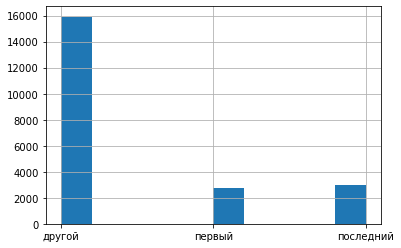

In [39]:
data['floor_type'].hist();

Добавили типирование этажа квартиры, разбили на три типа: первый, последний, другой.

В среднем, первые и последние этажи в домах стоят дешевле чем остальные.

##  Проведем исследовательский анализ данных

In [40]:
data1 = data.select_dtypes(include=np.number)
data1 = data1.drop(columns=['total_images'])
corr = data1.corr()
corr

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_meter
last_price,1.000000,0.739287,0.479675,0.407265,0.171344,0.625264,0.120967,0.522134,0.064537,-0.048260,-0.381736,0.131727,0.037937,0.158527,-0.060431,0.104731,-0.020569,0.008175,-0.016845,0.627223
total_area,0.739287,1.000000,0.799056,0.355782,-0.025383,0.918062,-0.029043,0.464152,0.047321,-0.035067,-0.198571,0.081342,-0.002209,0.108532,-0.036059,0.138481,-0.014480,0.008940,-0.076339,-0.011215
rooms,0.479675,0.799056,1.000000,0.190994,-0.218894,0.891029,-0.167755,0.087364,0.001496,-0.062635,-0.134674,0.070579,-0.045268,0.042495,-0.012650,0.099350,-0.002664,-0.000983,-0.044744,-0.177400
ceiling_height,0.407265,0.355782,0.190994,1.000000,-0.054530,0.312510,-0.036621,0.293306,-0.044408,-0.084521,-0.279930,0.184867,-0.059108,0.169791,-0.075329,0.084986,-0.020757,-0.002133,-0.040410,0.214891
floors_total,0.171344,-0.025383,-0.218894,-0.054530,1.000000,-0.169771,0.676508,0.304697,0.171288,0.106307,-0.002492,-0.238707,0.103092,-0.109568,0.029911,-0.044035,0.010965,0.014896,0.001008,0.321803
living_area,0.625264,0.918062,0.891029,0.312510,-0.169771,1.000000,-0.130044,0.200132,0.009156,-0.063426,-0.185796,0.103004,-0.039281,0.083444,-0.016611,0.123384,-0.006479,-0.001521,-0.061959,-0.102554
floor,0.120967,-0.029043,-0.167755,-0.036621,0.676508,-0.130044,1.000000,0.209102,0.169812,0.073142,0.000870,-0.156646,0.075203,-0.070154,0.027388,-0.036836,0.009685,0.017986,0.002314,0.236771
kitchen_area,0.522134,0.464152,0.087364,0.293306,0.304697,0.200132,0.209102,1.000000,0.077996,0.011423,-0.152113,-0.000580,0.054799,0.107484,-0.063189,0.072378,-0.013126,0.016714,-0.048873,0.255422
balcony,0.064537,0.047321,0.001496,-0.044408,0.171288,0.009156,0.169812,0.077996,1.000000,0.046420,0.060441,-0.080505,0.041427,-0.046231,0.024359,-0.024937,-0.003600,0.005552,0.001216,0.043657
airports_nearest,-0.048260,-0.035067,-0.062635,-0.084521,0.106307,-0.063426,0.073142,0.011423,0.046420,1.000000,0.265288,0.011217,-0.093584,-0.058533,0.021175,-0.019148,0.001105,0.006268,0.006684,-0.040703


In [41]:
corr.style.background_gradient(cmap = 'coolwarm')

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,weekday,month,year,price_meter
last_price,1.000000,0.739287,0.479675,0.407265,0.171344,0.625264,0.120967,0.522134,0.064537,-0.048260,-0.381736,0.131727,0.037937,0.158527,-0.060431,0.104731,-0.020569,0.008175,-0.016845,0.627223
total_area,0.739287,1.000000,0.799056,0.355782,-0.025383,0.918062,-0.029043,0.464152,0.047321,-0.035067,-0.198571,0.081342,-0.002209,0.108532,-0.036059,0.138481,-0.014480,0.008940,-0.076339,-0.011215
rooms,0.479675,0.799056,1.000000,0.190994,-0.218894,0.891029,-0.167755,0.087364,0.001496,-0.062635,-0.134674,0.070579,-0.045268,0.042495,-0.012650,0.099350,-0.002664,-0.000983,-0.044744,-0.177400
ceiling_height,0.407265,0.355782,0.190994,1.000000,-0.054530,0.312510,-0.036621,0.293306,-0.044408,-0.084521,-0.279930,0.184867,-0.059108,0.169791,-0.075329,0.084986,-0.020757,-0.002133,-0.040410,0.214891
floors_total,0.171344,-0.025383,-0.218894,-0.054530,1.000000,-0.169771,0.676508,0.304697,0.171288,0.106307,-0.002492,-0.238707,0.103092,-0.109568,0.029911,-0.044035,0.010965,0.014896,0.001008,0.321803
living_area,0.625264,0.918062,0.891029,0.312510,-0.169771,1.000000,-0.130044,0.200132,0.009156,-0.063426,-0.185796,0.103004,-0.039281,0.083444,-0.016611,0.123384,-0.006479,-0.001521,-0.061959,-0.102554
floor,0.120967,-0.029043,-0.167755,-0.036621,0.676508,-0.130044,1.000000,0.209102,0.169812,0.073142,0.000870,-0.156646,0.075203,-0.070154,0.027388,-0.036836,0.009685,0.017986,0.002314,0.236771
kitchen_area,0.522134,0.464152,0.087364,0.293306,0.304697,0.200132,0.209102,1.000000,0.077996,0.011423,-0.152113,-0.000580,0.054799,0.107484,-0.063189,0.072378,-0.013126,0.016714,-0.048873,0.255422
balcony,0.064537,0.047321,0.001496,-0.044408,0.171288,0.009156,0.169812,0.077996,1.000000,0.046420,0.060441,-0.080505,0.041427,-0.046231,0.024359,-0.024937,-0.003600,0.005552,0.001216,0.043657
airports_nearest,-0.048260,-0.035067,-0.062635,-0.084521,0.106307,-0.063426,0.073142,0.011423,0.046420,1.000000,0.265288,0.011217,-0.093584,-0.058533,0.021175,-0.019148,0.001105,0.006268,0.006684,-0.040703


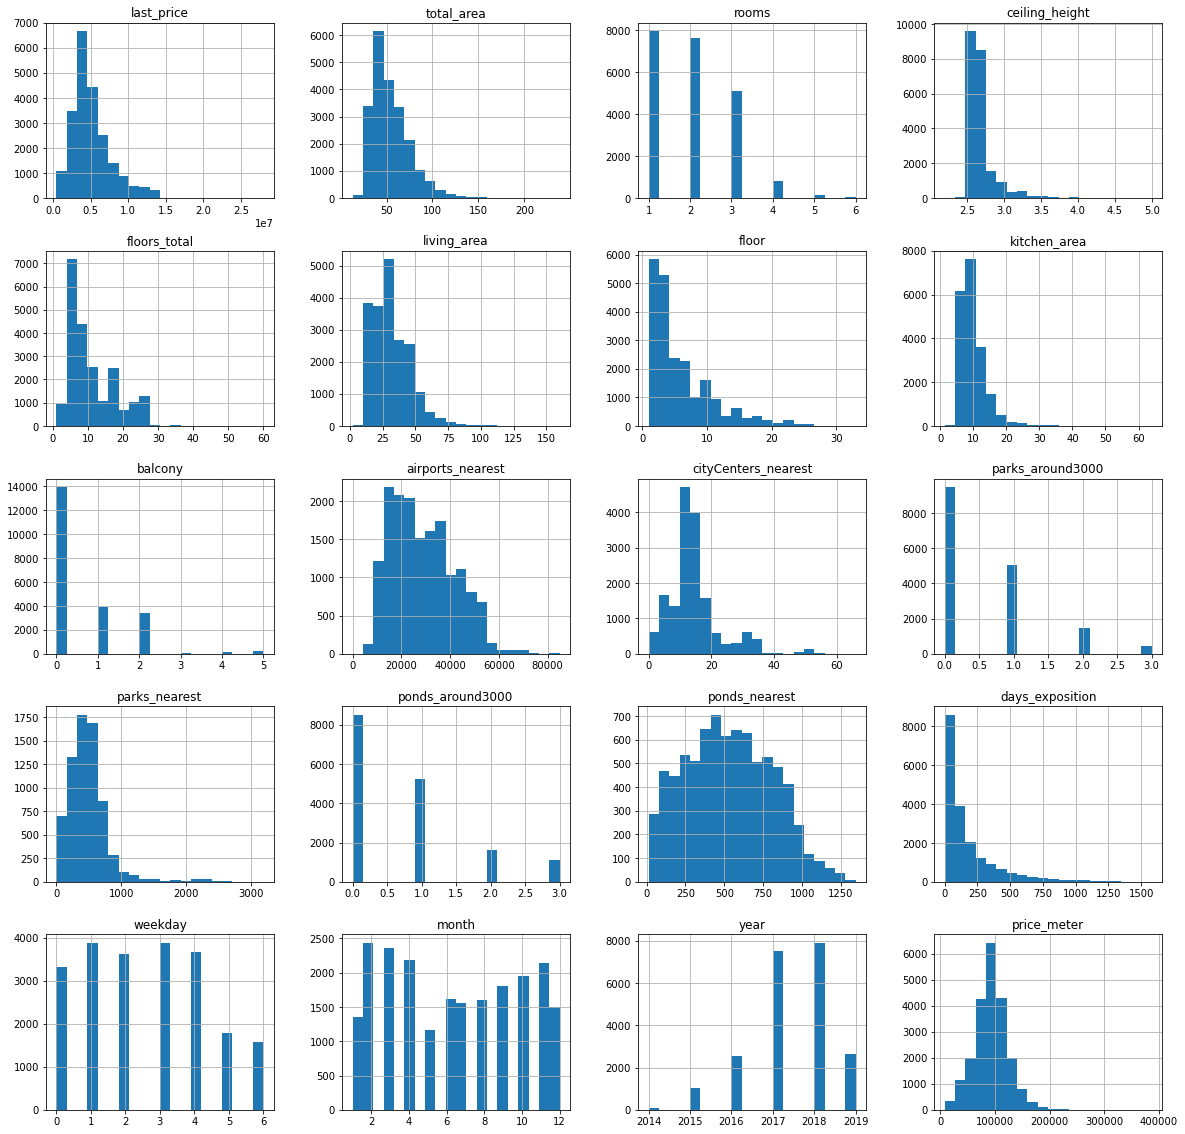

In [42]:
data1.hist(bins = 20, figsize = (20, 20));

По построенным гистограммам передобработанной таблицы можно сделать предварительный вывод: в большинстве гистограмм видны явные пики значений, вполне соответствующие нормальному распределению величин. Количественное отношение не показало критичных соотношений. Явные показатели гистограмм гоаорят о том, что в выходные дни количество опубликованных обьявлений падает, май - самый малочисленый на количество публикаций, пик предложений был в 20017-2018 годах с резким спадом в 2019 году .

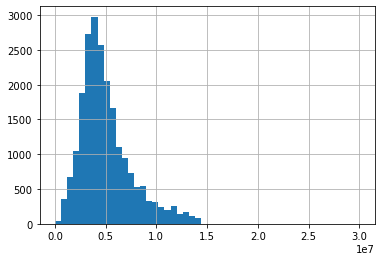

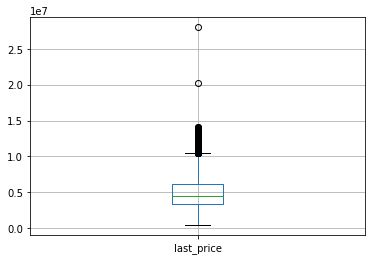

In [43]:
data['last_price'].hist(bins = 50, range = (1, 3e7))
plt.show()
data.boxplot('last_price');

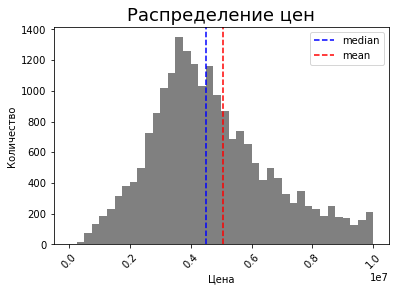

In [44]:
plt.hist(data['last_price'], bins = 40, color ='gray', range =(0, 10000000))
plt.axvline(data['last_price'].median(), color ='b', linestyle ='--', label ='median')
plt.axvline(data['last_price'].mean(), color ='r', linestyle ='--', label ='mean')
plt.title('Распределение цен', fontsize = 18)
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation = 45);

Видно, что наиболее продаваемые квартиры находятся в ценовом диапазоне ниже среднего и медианного значений, примерно от 3 до 4 млн. Возле медианного значения цены виден еще один пик, а затем идет резкий спад.

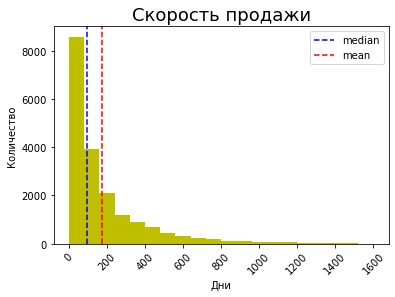

In [45]:
plt.hist(data['days_exposition'], bins = 20, color ='y', range =(0, 1600))
plt.axvline(data['days_exposition'].median(), color ='b', linestyle ='--', label ='median')
plt.axvline(data['days_exposition'].mean(), color ='r', linestyle ='--', label ='mean')
plt.title('Скорость продажи', fontsize = 18)
plt.xlabel('Дни')
plt.ylabel('Количество')
plt.legend()
plt.xticks(rotation = 45);

In [46]:
data['days_exposition'].describe()

count    19035.000000
mean       176.032256
std        214.762839
min          1.000000
25%         44.000000
50%         93.000000
75%        223.500000
max       1580.000000
Name: days_exposition, dtype: float64

Основная часть квартир продается в течении первых трех месяцев, это видно на гистограмме. Еще половина от оставшейся части - за следующие три месяца. 

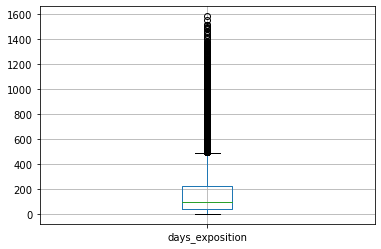

In [47]:
data.boxplot('days_exposition');

Продажи, произведенные быстрее данных первого квартиля - быстрые, необычно долгими я бы считала те, кторые выхоят за рамки четвертого квартиля.
44 и 500 дней соответственно.

## Проверим некоторые гипотезы скорости продаж

### Приближенность к водоему влияет на скорость продажи

In [48]:
data_nearest = data.pivot_table(index = data.index, values =('ponds_nearest','parks_nearest',
                                                         'days_exposition','airports_nearest',
                                                         'price_meter'), aggfunc = 'median')\
                   .sort_values(by ='days_exposition',ascending=False).round().head(20)

In [49]:
data_nearest.corr()

,airports_nearest,days_exposition,parks_nearest,ponds_nearest,price_meter
airports_nearest,1.000000,-0.083785,0.583986,-0.116254,-0.166834
days_exposition,-0.083785,1.000000,-0.420006,-0.075326,0.110265
parks_nearest,0.583986,-0.420006,1.000000,-0.462027,0.114179
ponds_nearest,-0.116254,-0.075326,-0.462027,1.000000,-0.327720
price_meter,-0.166834,0.110265,0.114179,-0.327720,1.000000


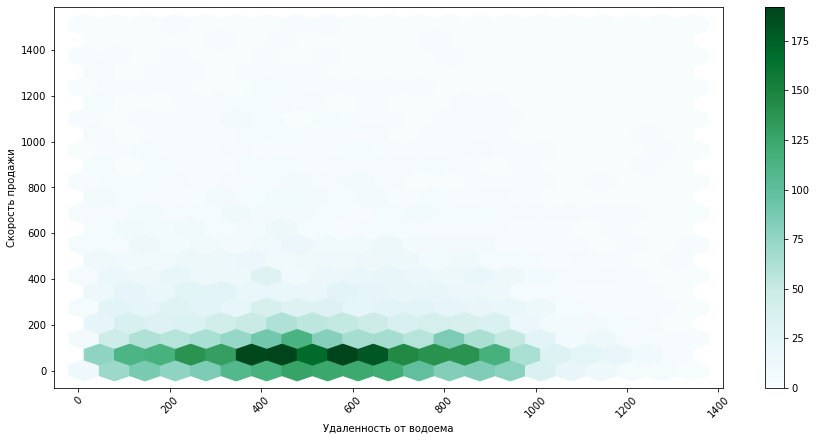

In [50]:
data.plot(y = 'days_exposition', x = 'ponds_nearest', kind = 'hexbin', gridsize = 20, 
          rot = 45, sharex = False, figsize = (15,7))
plt.xlabel('Удаленность от водоема')
plt.ylabel('Скорость продажи');

**Зависимость явная от приближеннотси к водоемам не замечена**

### Количество комнат влияет на скорость продажи

In [51]:
data_pivot = data.pivot_table(index ='rooms',values ='days_exposition',aggfunc =['median','count'])
data_pivot.columns
data_pivot.columns = data_pivot.columns.droplevel(1)
data_pivot.sort_values(by = 'median',ascending = True).head(20)

,median,count
rooms,,
1,81.0,7201
2,90.0,6682
3,112.0,4317
4,143.0,689
5,164.5,124
6,284.5,22


__Быстрее всего продаются однокомнатные квартиры и двухкомнатные, чем больше комнат - тем дольше продается квартира__

## Проверим некоторые гипотезы стоимости квадратного метра

### Этаж и этажность влияет на стоимоть квадратного метра

In [52]:
data2 = pd.pivot_table(data, index = ['floor_type','floors_total'],
                       values = ['last_price','price_meter','total_area','rooms']).round()

data2.sort_values(by ='price_meter',ascending = False).head(20)

last_price  price_meter  rooms  total_area
floor_type floors_total                                            
другой     34             3550000.0     126786.0    1.0        28.0
последний  13             7007947.0     120653.0    2.0        57.0
           22             5405385.0     118370.0    1.0        45.0
другой     13             6620241.0     117412.0    2.0        56.0
           36             7595000.0     116796.0    2.0        64.0
           11             6671020.0     116445.0    2.0        58.0
последний  24             6667438.0     114592.0    2.0        59.0
           11             7196400.0     114160.0    2.0        60.0
другой     35             7094172.0     111211.0    2.0        64.0
последний  15             6200000.0     110593.0    2.0        56.0
другой     7              7104703.0     110540.0    2.0        66.0
           20             6178724.0     109253.0    2.0        56.0
последний  14             6241194.0     108915.0    2.0        56.0
другой     25             6001456.0     108765.0    2.0        55.0
           19             5681962.0     108589.0    2.0        53.0
           24             5582194.0     108442.0    2.0        52.0
последний  16             6029266.0     108338.0    2.0        56.0
другой     22             5480388.0     107917.0    2.0        51.0
           8              6429525.0     107909.0    2.0        60.0
           16             5972623.0     107157.0    2.0        56.0

In [53]:
data2.sort_values(by ='price_meter',ascending = False).tail(20)

last_price  price_meter  rooms  total_area
floor_type floors_total                                            
другой     4              5772492.0      89838.0    2.0        63.0
последний  9              4423058.0      89657.0    2.0        51.0
первый     19             4560876.0      89163.0    2.0        54.0
           18             4843377.0      89148.0    2.0        56.0
           12             4811648.0      88963.0    2.0        55.0
последний  4              5739573.0      88271.0    2.0        63.0
первый     4              4964489.0      85835.0    2.0        58.0
           27             2936289.0      83521.0    1.0        35.0
другой     60             3800000.0      83516.0    2.0        46.0
первый     9              4423354.0      83123.0    2.0        55.0
           15             4176792.0      82341.0    2.0        54.0
другой     5              4295458.0      80564.0    2.0        53.0
           3              4514747.0      77047.0    2.0        57.0
последний  5              4054186.0      76897.0    2.0        52.0
первый     5              3824143.0      75824.0    2.0        51.0
последний  3              4375309.0      73071.0    2.0        57.0
первый     3              3710698.0      68448.0    2.0        53.0
последний  2              2954362.0      50741.0    2.0        54.0
первый     2              2584650.0      49510.0    2.0        49.0
           1              2522143.0      42637.0    2.0        60.0

__Наиболее дорогая цена за квадратный метр в квартирах находящихся выше первого этажа и в домах, этажность которых превосходит 5 этажей.__

### Стоимость квадратного метра зависит от общей площади

In [54]:
data2.corr()

,last_price,price_meter,rooms,total_area
last_price,1.000000,0.661295,0.518074,0.761120
price_meter,0.661295,1.000000,-0.053926,0.037728
rooms,0.518074,-0.053926,1.000000,0.739965
total_area,0.761120,0.037728,0.739965,1.000000


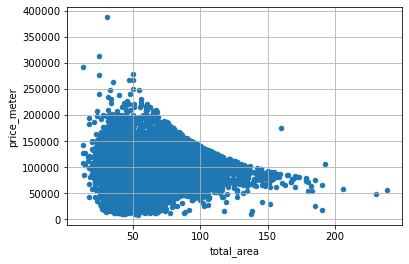

In [55]:
data.plot(x = 'total_area',y ='price_meter' ,kind = 'scatter',grid=True);

__Пиковая стоимость квадратного метра приходится на квартиры площадью 40-60 м2__

### Матрица корреляций

In [56]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'weekday', 'month', 'year',
       'price_meter', 'floor_type'],
      dtype='object')

In [57]:
data_sort = data.loc[:,['total_area','living_area', 'kitchen_area', 'rooms', 'last_price']]
data_sort.corr()

,total_area,living_area,kitchen_area,rooms,last_price
total_area,1.000000,0.918062,0.464152,0.799056,0.739287
living_area,0.918062,1.000000,0.200132,0.891029,0.625264
kitchen_area,0.464152,0.200132,1.000000,0.087364,0.522134
rooms,0.799056,0.891029,0.087364,1.000000,0.479675
last_price,0.739287,0.625264,0.522134,0.479675,1.000000


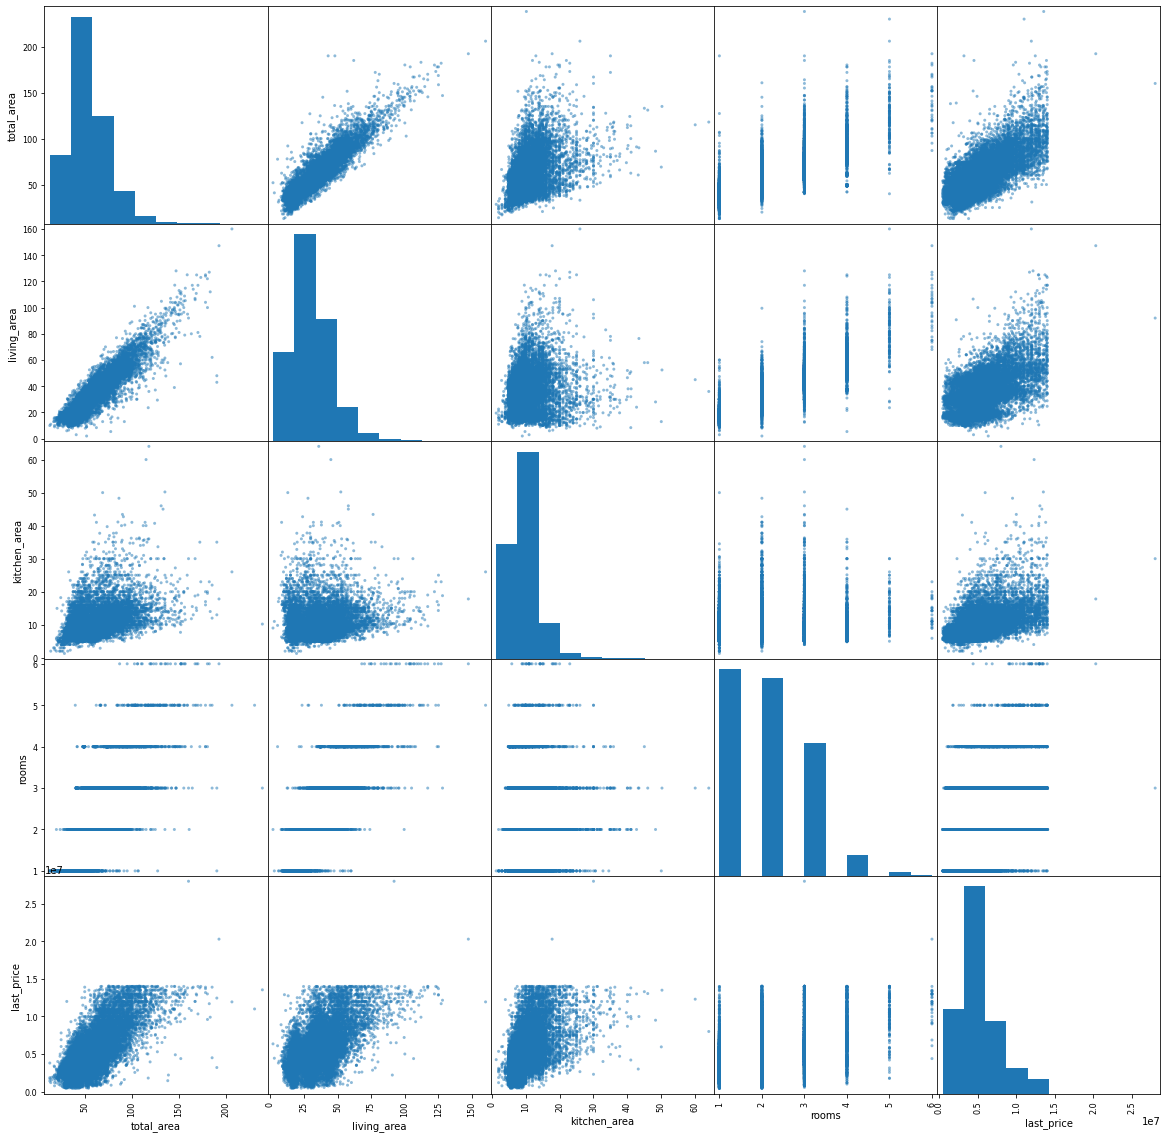

In [58]:
pd.plotting.scatter_matrix(data_sort, figsize = (20, 20))
plt.show();

__В построенной матрице диаграмм рассеяния видно следующее__:

    - пик на правой левой гистограмме показывает, что больше всего квартир представлено площадью 40-60 м2,
    - жилая площадь довольно сильно коррелирует с общей площадью, а площадь кухни не имеет такую явную зависимоcть.
    - Больше всего квартир с кухнями 10-15 м2.
    - Площадь квартиры и жилая площадь увеличивается с увеличением числа комнат, а площадь кухни не имеет такой зависимости

In [59]:
data_date = data.loc[:,['last_price','weekday','month','year']]


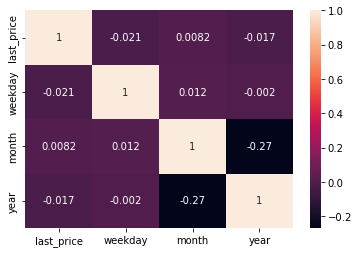

In [60]:
sns.heatmap(data_date.corr(), annot = True);

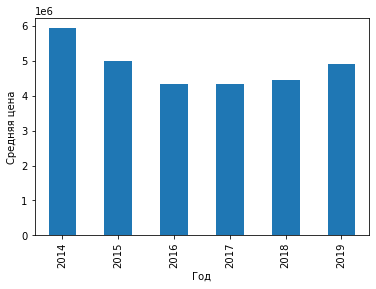

In [61]:
fig, ay = plt.subplots()
data.groupby('year')['last_price'].median().plot(kind = 'bar', title = 'abc')
ay.set_ylabel('Средняя цена')
ay.set_xlabel('Год')
ay.set_title('')
plt.show()

На тепловой карте не замечено явных корреляций. Построив столбчатую диаграмму заметили, что самая высокая средняя цена квартиры была в 2014 году, после этого пошел спад до 2018 года, потом цена опять стала расти.

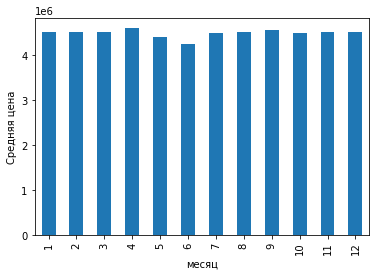

In [62]:
fig, ay = plt.subplots()
data.groupby('month')['last_price'].median().plot(kind = 'bar', title = 'abc')
ay.set_ylabel('Средняя цена')
ay.set_xlabel('месяц')
ay.set_title('')
plt.show()

В первый летний месяц цена немного опускается.

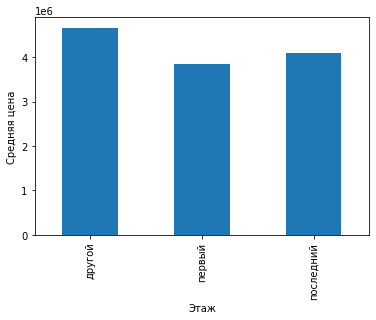

In [63]:
fig, ay = plt.subplots()
data.groupby('floor_type')['last_price'].median().plot(kind = 'bar', title = 'abc')
ay.set_ylabel('Средняя цена')
ay.set_xlabel('Этаж')
ay.set_title('')
plt.show()

Наиболее дешевыми являются квартиры на первом этаже, последний этаж немного дороже, однако уступает значительно по стоимости остальным этажам.

In [64]:
data_pivot = data.pivot_table(index ='locality_name',values = 'price_meter',
                              aggfunc = ['min','median','max','count']).round()
data_pivot.columns
data_pivot.columns = data_pivot.columns.droplevel(1)
data10 = data_pivot.sort_values(by = 'count',ascending = False).head(10)

In [65]:
data10.sort_values(by = 'median',ascending = False)

,min,median,max,count
locality_name,,,,
Санкт-Петербург,15345.0,102500.0,387097.0,14177
Пушкин,59836.0,98472.0,166667.0,341
поселок Парголово,48405.0,91429.0,138522.0,315
деревня Кудрово,54160.0,91429.0,141026.0,275
поселок Мурино,50000.0,84043.0,138580.0,515
поселок Шушары,47700.0,76585.0,126667.0,425
Колпино,47957.0,74324.0,113000.0,321
Гатчина,10507.0,67124.0,105818.0,292
Всеволожск,31400.0,65595.0,104167.0,380


Сводная таблица с данными о самой низкой, средней и максимальной ценой за квадратный метр в десяти населенных пунктах, с наибольшим количеством обьявлений. Средняя цена за квадратный метр самая низкая в Выборге, самая высокая, что не удивительно, в СПБ и Пушкин.

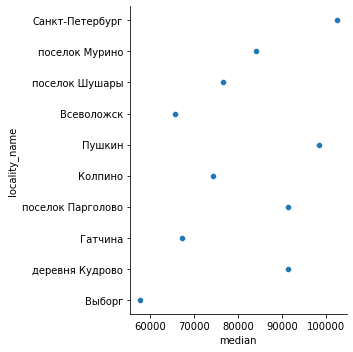

In [66]:
sns.relplot(x = 'median', y = 'locality_name', data = data10);


Визуализация распределения средней цены за квадратный метр в десяти населенных пунктах, с максимальным количеством объявлений.

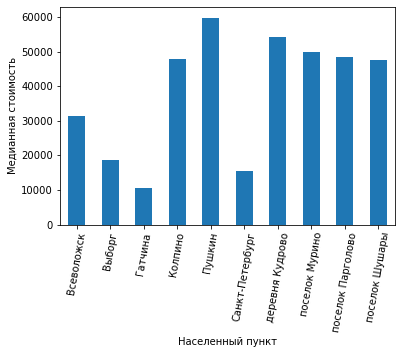

In [67]:
data10.groupby('locality_name')['min'].median().plot.bar(rot = 80)
plt.ylabel('Медианная стоимость')
plt.xlabel('Населенный пункт');

Однако, квартира по самой низкой стоимости за квадратный метр продавалась в Гатчине,потом в СПБ, а самая высокая минимальная стоимость зафиксирована в Пушкино.

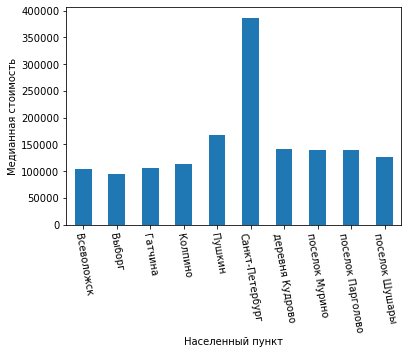

In [68]:
data10.groupby('locality_name')['max'].median().plot.bar(rot = -80)
plt.ylabel('Медианная стоимость')
plt.xlabel('Населенный пункт');

С максимальной стоимостью за квадратный метр все обстоит иначе. Самая дорогая квартира продавалась в СПБ, остальные максимальные цены не имеют слишком большого разброса.

In [69]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb_pivot = spb.pivot_table(index = 'cityCenters_nearest' ,values = 'price_meter',
                            aggfunc = ('mean','median')).round().head(20).sort_values(by ='cityCenters_nearest')
spb_pivot.style.background_gradient(cmap ='coolwarm')

,mean,median
cityCenters_nearest,,
0.000000,118753.000000,108163.000000
1.000000,120519.000000,114229.000000
2.000000,117824.000000,111765.000000
3.000000,110138.000000,104212.000000
4.000000,115949.000000,110090.000000
5.000000,121410.000000,118664.000000
6.000000,123324.000000,118353.000000
7.000000,119177.000000,114958.000000
8.000000,117393.000000,115000.000000


In [70]:
def range_km (row):
    km = row['cityCenters_nearest']
    if 0 <= km <= 5:
        return '1-5 километр от Центра'
    if 5< km <= 10:
        return '5-10 километр от Центра'
    if 10< km <= 15:
        return '10-15 километр от Центра'
    if 15< km <= 20:
        return '15-20 километр от Центра'
    return "Дальше"
spb['km_type'] = spb.apply(range_km, axis = 1)

#spb.sort_values(by='km_type').head(20)
#pd.options.mode.chained_assignmment = None
spb_pivot=spb.pivot_table(index='km_type', values='price_meter',
                          aggfunc='median').sort_values(by='price_meter', ascending=False)


/var/folders/gx/5my74w650ns3gqtsf0t0lk_80000gn/T/ipykernel_3214/4191972995.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['km_type']= spb.apply(range_km,axis=1)


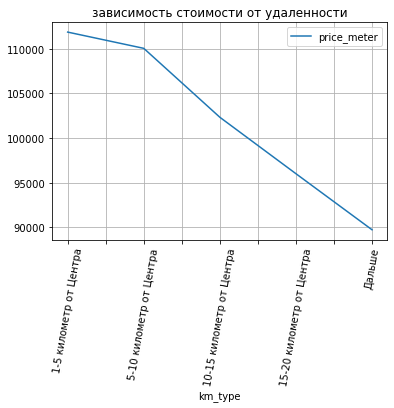

In [71]:
spb_pivot.plot(grid = True, rot = 80, title = 'зависимость стоимости от удаленности');

до 10 км от центра  СПБ зависимость от удаленности не такая существенная, хотя и заметно снижение стоимости за квадратный метр, как при большей удаленности, там уже зависимость прямо пропорциональная.

## Общий вывод

В ходе работы на проектом были изучены данные о продажах недвижимости. Для проведения анализа мы: 
1. Избавились от пропусков в датасете и заполнили случайные пропуски там, где это было возможно сделать максимально безболезненно для результатов анализа.
1.1 Проверили данные на наличие явных дубликатов
2. Удалили выбросы и аномальные значения, такие как количество комнат равное 0 и 19, площадь квартиры 12 и 900 м2, стоимость квартиры 13 тыс и 763 млн, высоту потолков 1.2 и 100 м
3. Произвели рассчеты стоимости м2
4. Избавились от неявных дубликатов в названих населенных пунктов.
5. Выделели параметры, которые влияют на скорость продажи квартиры, такие как : площадь, этаж, удаленность от центра. 
6. Сильной зависимости цены квадратного метра и скорости продажи от удаленности от аэропорта, водоема и парка не было выявлено.
7. Самая большая стоимость за квадратный метр площади квартиры, расположенной в Санкт-Петербурге в радиусе до 5 км от центра города, на верхних этажах в многоэтажных домах (более 7 этажей). Средняя цена за квадратный метр самая низкая, среди 10 населенных пунктов с наибольшим числом обьявлений, -  в Выборге, самая высокая цена, что не удивительно,- в СПБ и Пушкино.
8. Быстрее всего продаются 1 и 2-хкомнатные квартиры, стоимостью от 3 до 4 млн, общей площадью от 40 до 60 м2

9. Большая часть продаж происходит в первые три месяца со дня публикации обьявления.Очень быстрыми продажами прелагаю считать продажи до 44 дня с момента публикации, а необычно долгими - те , которые находились не завершенными более 500 дней. 
10. С 2015 года по конец 2017 отмечается существенное падение средней цены на квартиры, с 2018 года начался медленный рост цен.  

